# Modelo de clasificación de accidentalidad laboral mediante árboles de decisión

**Elias Buitrago Bolivar** <br>
*Bogotá, Colombia* <br>
*7/abril/2021* <br>

## Cargar librerías

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import metrics, svm
from sklearn.metrics import recall_score
import graphviz
import seaborn as sns

## Cargar datos

In [156]:
#Cargar datos para el modelo
#En PowerBI se creo un nuevo dataset a partir de los datos original con el objetivo de filtrar variables de interés.
col_names = ['id_trabajador', 'edad', 'genero', 'nivel_educativo', 'num_hijos', 
             'tipo_cargo', 'capacitado', 'jornada', 'antiguedad', 'id_empresa', 
             'accidentado', 'id_accidente', 'parte_del_cuerpo', 'lesion', 
             'sector_economico', 'tipo_empresa', 'sistema_gestion']
trabajadores_full = pd.read_excel("datos/trabajadores_full.xlsx", names=col_names)
trabajadores_full.head()
trabajadores_full.shape

(3000, 17)

In [157]:
#Transformar variables string a numérico
trabajadores_full_num = trabajadores_full
trabajadores_full_num['genero'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['genero'])
trabajadores_full_num['nivel_educativo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['nivel_educativo'])
trabajadores_full_num['tipo_cargo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['tipo_cargo'])
trabajadores_full_num['jornada'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['jornada'])
# trabajadores_full_num['parte_del_cuerpo'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['parte_del_cuerpo'])
# trabajadores_full_num['lesion'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['lesion'])
trabajadores_full_num['sector_economico'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['sector_economico'])
trabajadores_full_num['tipo_empresa'] = preprocessing.LabelEncoder().fit_transform(trabajadores_full_num['tipo_empresa'])

In [158]:
trabajadores_full_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trabajador     3000 non-null   int64 
 1   edad              3000 non-null   int64 
 2   genero            3000 non-null   int32 
 3   nivel_educativo   3000 non-null   int32 
 4   num_hijos         3000 non-null   int64 
 5   tipo_cargo        3000 non-null   int32 
 6   capacitado        3000 non-null   int64 
 7   jornada           3000 non-null   int32 
 8   antiguedad        3000 non-null   int64 
 9   id_empresa        3000 non-null   int64 
 10  accidentado       3000 non-null   int64 
 11  id_accidente      3000 non-null   int64 
 12  parte_del_cuerpo  3000 non-null   object
 13  lesion            3000 non-null   object
 14  sector_economico  3000 non-null   int32 
 15  tipo_empresa      3000 non-null   int32 
 16  sistema_gestion   3000 non-null   int64 
dtypes: int32(6), i

In [159]:
# Variables para el modelo
feature_cols=['edad', 'genero', 'nivel_educativo', 'num_hijos', 
             'tipo_cargo', 'capacitado', 'jornada', 'antiguedad', 'id_empresa', 
             'sector_economico', 'tipo_empresa', 
             'sistema_gestion']
X = trabajadores_full_num[feature_cols] # Caracteristicas
y = trabajadores_full_num.accidentado # Variable objetivo

## Definición del modelo

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) # 70% training and 30% test
arbol1 = DecisionTreeClassifier()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1500, 12) (1500, 12)
(1500,) (1500,)


## Entrenamiento y evaluación del modelo

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
arbol1 = DecisionTreeClassifier()
arbol1 = arbol1.fit(X_train,y_train)
y_pred = arbol1.predict(X_test)     
print("La exactitud del árbol de clasificación inicial es:", metrics.accuracy_score(y_test, y_pred))

La exactitud del árbol de clasificación inicial es: 0.6044444444444445


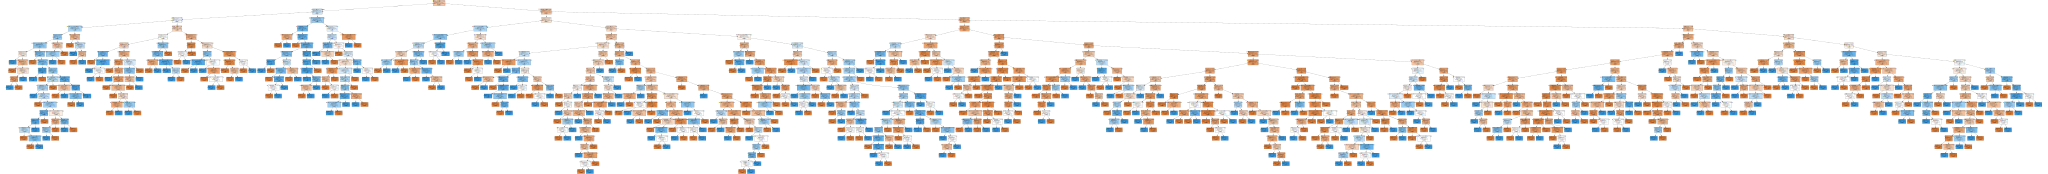

In [162]:
# Visualización del árbol
export_graphviz(arbol1,out_file= 'arbol1.dot', class_names=['0','1'],
                feature_names=feature_cols,impurity=False,filled=True)
with open ('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source (dot_graph)

## Podando el árbol

In [163]:
arbol2 = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 7, max_depth= 4)
arbol2.fit(X_train,y_train)
y_pred = arbol2.predict(X_test)     
print("La exactitud del árbol de clasificación con poda es:", metrics.accuracy_score(y_test, y_pred))

La exactitud del árbol de clasificación con poda es: 0.7055555555555556


### Visualización del árbol con poda

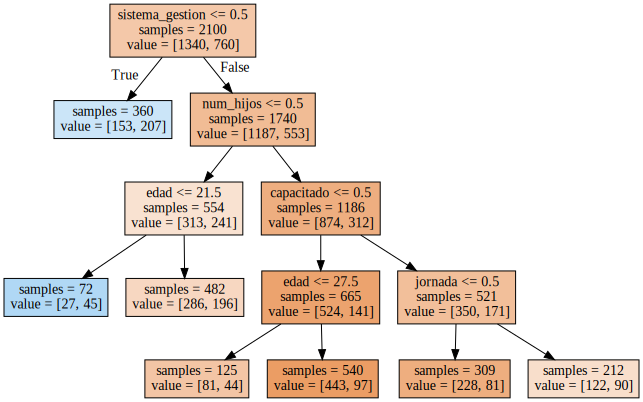

In [164]:
export_graphviz(arbol2,out_file= 'arbol2.dot', 
                feature_names=feature_cols,impurity=False,filled=True)
with open ('arbol2.dot') as f:
    dot_graph=f.read()
graphviz.Source (dot_graph)

## Identificar importancia de variables

In [165]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(arbol2)
clf.fit(X, y)
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

ranking_vars=pd.DataFrame({"vars":feature_cols,
                           "importancia":feature_importances})
ranking_vars

,vars,importancia
0,edad,0.173368
1,genero,0.000000
2,nivel_educativo,0.006787
3,num_hijos,0.198546
4,tipo_cargo,0.004082
5,capacitado,0.065187
6,jornada,0.093271
7,antiguedad,0.008761
8,id_empresa,0.020128
9,sector_economico,0.024628


## Métricas de desempeño complementarias

### Recall

In [166]:
recall_score(y_test, y_pred, average='weighted')

0.7055555555555556

### Matriz de confusión

Matriz de confusión:
[[529  64]
 [201 106]]


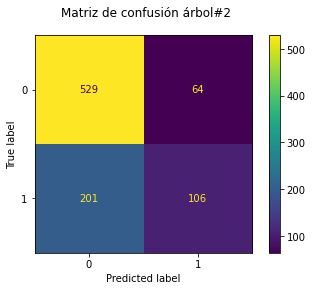

In [167]:
#0: No accidentado
#1: accidentado
disp = metrics.plot_confusion_matrix(arbol2, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión árbol#2")
print(f"Matriz de confusión:\n{disp.confusion_matrix}")

plt.show()

In [168]:
# Mostrar la precisión, recall, F1-score
clases = ['No accidentado', 'Accidentado']
print("\n", metrics.classification_report(y_test, y_pred, digits=2, target_names=clases))


                 precision    recall  f1-score   support

No accidentado       0.72      0.89      0.80       593
   Accidentado       0.62      0.35      0.44       307

      accuracy                           0.71       900
     macro avg       0.67      0.62      0.62       900
  weighted avg       0.69      0.71      0.68       900



## Tratamiendo del desbalanceo de clases (*class imbalanced problem, CIP*)
*Referencias* <br>
1. https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

### ¿Por qué hay *CIP*?

C:\Users\ebuit\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


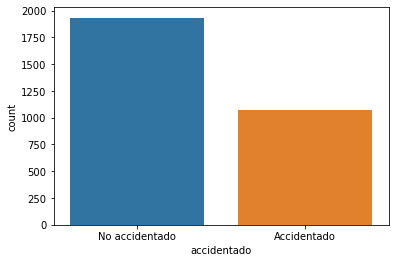

In [169]:
# Visualizando variable objetivo
g = sns.countplot(trabajadores_full['accidentado'])
g.set_xticklabels(['No accidentado','Accidentado'])
plt.show()

### SVM Penalizado

In [170]:
# load library
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [171]:
# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [172]:
svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.5448583089354082
Accuracy score: 0.6
F1 score: 0.38775510204081637


### Random Forest

In [173]:
# load library
from sklearn.ensemble import RandomForestClassifier

In [174]:
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [175]:
# predict
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.5814249853063153
Accuracy score: 0.6688888888888889
F1 score: 0.3868312757201646


### Técnica *Near Miss*

In [176]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)

# print('Original dataset shape:', Counter(y))
# print('Resample dataset shape:', Counter(y_nm))

C:\Users\ebuit\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


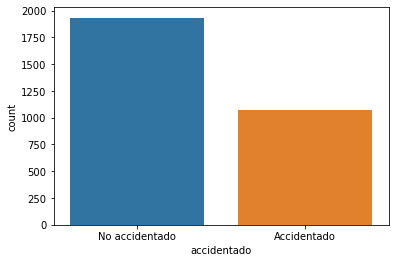

In [177]:
g = sns.countplot(y)
g.set_xticklabels(['No accidentado','Accidentado'])
plt.show()

C:\Users\ebuit\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


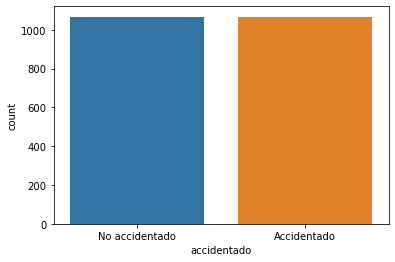

In [178]:
g = sns.countplot(y_nm)
g.set_xticklabels(['No accidentado','Accidentado'])
plt.show()

## Árboles de decisión datos balanceados

In [179]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)

In [180]:
X = x_nm
y = y_nm

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) # 70% training and 30% test
arbol1 = DecisionTreeClassifier()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1067, 12) (1067, 12)
(1067,) (1067,)


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
arbol3 = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 7, max_depth= 4)
arbol3.fit(X_train,y_train)
y_pred = arbol3.predict(X_test)     
print("La exactitud del árbol de clasificación #3 es:", metrics.accuracy_score(y_test, y_pred))

La exactitud del árbol de clasificación #3 es: 0.6068642745709828


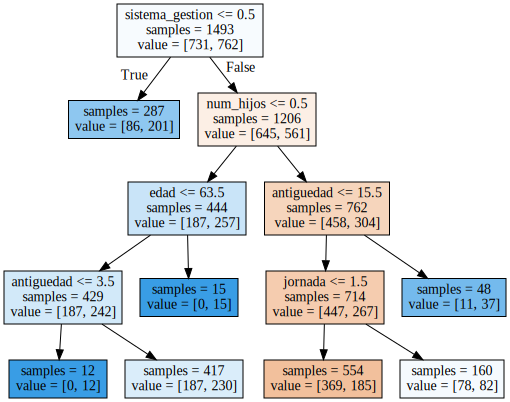

In [183]:
export_graphviz(arbol3,out_file= 'arbol3.dot', 
                feature_names=feature_cols,impurity=False,filled=True)
with open ('arbol3.dot') as f:
    dot_graph=f.read()
graphviz.Source (dot_graph)

In [184]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(arbol3)
clf.fit(X, y)
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

ranking_vars=pd.DataFrame({"vars":feature_cols,
                           "importancia":feature_importances})
ranking_vars

,vars,importancia
0,edad,0.196688
1,genero,0.000000
2,nivel_educativo,0.000000
3,num_hijos,0.154961
4,tipo_cargo,0.030714
5,capacitado,0.050954
6,jornada,0.049385
7,antiguedad,0.207520
8,id_empresa,0.012728
9,sector_economico,0.000000


Matriz de confusión:
[[281  55]
 [198 107]]


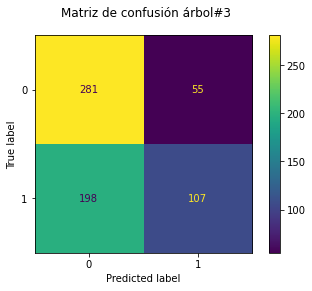

In [187]:
#0: No accidentado
#1: accidentado
disp = metrics.plot_confusion_matrix(arbol2, X_test, y_test)
disp.figure_.suptitle("Matriz de confusión árbol#3")
print(f"Matriz de confusión:\n{disp.confusion_matrix}")

plt.show()

In [186]:
# Mostrar la precisión, recall, F1-score
clases = ['No accidentado', 'Accidentado']
print("\n", metrics.classification_report(y_test, y_pred, digits=2, target_names=clases))


                 precision    recall  f1-score   support

No accidentado       0.66      0.51      0.58       336
   Accidentado       0.57      0.71      0.63       305

      accuracy                           0.61       641
     macro avg       0.62      0.61      0.60       641
  weighted avg       0.62      0.61      0.60       641

